In [2]:
%env keras_backend = tensorflow

env: keras_backend=tensorflow


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from keras.datasetsatasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Preparation of data

DO NOT need to flatten. But we need to tell keras that out data only has 1 channel (greys).

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

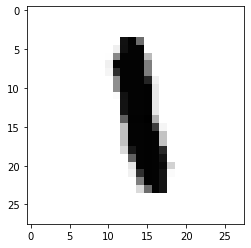

In [13]:
plt.imshow(x_train[9487][:,:,0], cmap='Greys')

Construct CNN

In [15]:
from keras.utils import np_utils

In [16]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test,10)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))

In [28]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))

In [30]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [31]:
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))

In [32]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [33]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [34]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [36]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [37]:
model.summary()
# 320 = (3*3+1)*32

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
__________

Train the model

In [40]:
model.fit(x_train, y_train, batch_size=100, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 41s 682us/step - loss: 0.0076 - acc: 0.9494
Epoch 2/12
60000/60000 [==============================] - 41s 676us/step - loss: 0.0044 - acc: 0.9716
Epoch 3/12
60000/60000 [==============================] - 41s 677us/step - loss: 0.0033 - acc: 0.9787
Epoch 4/12
60000/60000 [==============================] - 41s 687us/step - loss: 0.0027 - acc: 0.9826
Epoch 5/12
60000/60000 [==============================] - 41s 687us/step - loss: 0.0022 - acc: 0.9860
Epoch 6/12
60000/60000 [==============================] - 45s 752us/step - loss: 0.0019 - acc: 0.9882
Epoch 7/12
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0016 - acc: 0.9898
Epoch 8/12
60000/60000 [==============================] - 43s 722us/step - loss: 0.0014 - acc: 0.9914
Epoch 9/12
60000/60000 [==============================] - 42s 695us/step - loss: 0.0012 - acc: 0.9931
Epoch 10/12
60000/60000 [==============================] - 40s 667us/step - loss: 0

In [41]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 162us/step


In [42]:
print('loss: ', score[0])
print('accuracy: ', score[1])

loss:  0.0021375513744114256
accuracy:  0.9857


In [43]:
model_json = model.to_json()
open('handwriting_model_cnn.json', 'w').write(model_json)
model.save_weights('handwriting_weights_cnn.h5')

In [45]:
predict = model.predict_classes(x_test)

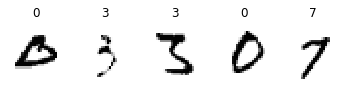

In [46]:
pick = np.random.randint(1, 9999, 5)

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis('off')